## Canda Immigration: Charts
##### Area Plots, Histograms, and Bar Charts

Importing our libraries:

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
plt.style.use('ggplot') # ggplot-like style

Fetching our data:

In [2]:
df_canada = pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/Data%20Files/Canada.csv')
df_canada.head(5)

,Country,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
0,Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
1,Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,...,1223,856,702,560,716,561,539,620,603,15699
2,Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,...,3626,4807,3623,4005,5393,4752,4325,3774,4331,69439
3,American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,6
4,Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,...,0,1,1,0,0,0,0,1,1,15


Setting our index to 'Country' for easy traversal:

In [3]:
df_canada.set_index('Country', inplace=True)
df_canada.head(2)

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,496,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,1,...,1223,856,702,560,716,561,539,620,603,15699


Creating list of years for easy plotting:

In [4]:
years = list(map(str,range(1980,2014)))
years

['1980',
 '1981',
 '1982',
 '1983',
 '1984',
 '1985',
 '1986',
 '1987',
 '1988',
 '1989',
 '1990',
 '1991',
 '1992',
 '1993',
 '1994',
 '1995',
 '1996',
 '1997',
 '1998',
 '1999',
 '2000',
 '2001',
 '2002',
 '2003',
 '2004',
 '2005',
 '2006',
 '2007',
 '2008',
 '2009',
 '2010',
 '2011',
 '2012',
 '2013']

## Area Plots
#### Top 5 Countries
Also known as a stacked line plot.

Sorting our rows by Total:

In [5]:
df_canada.sort_values(['Total'], ascending=False, axis=0, inplace=True)

Retrieving top 5 countries:

In [6]:
df_top5 = df_canada.head() # default is 5

Transposing our dataframe for correct plotting:

In [7]:
df_top5 = df_top5[years].transpose()
# use of years excludes total
df_top5.head()

Country,India,China,United Kingdom of Great Britain and Northern Ireland,Philippines,Pakistan
1980,8880,5123,22045,6051,978
1981,8670,6682,24796,5921,972
1982,8147,3308,20620,5249,1201
1983,7338,1863,10015,4562,900
1984,5704,1527,10170,3801,668


#### Plotting our Area Plot:

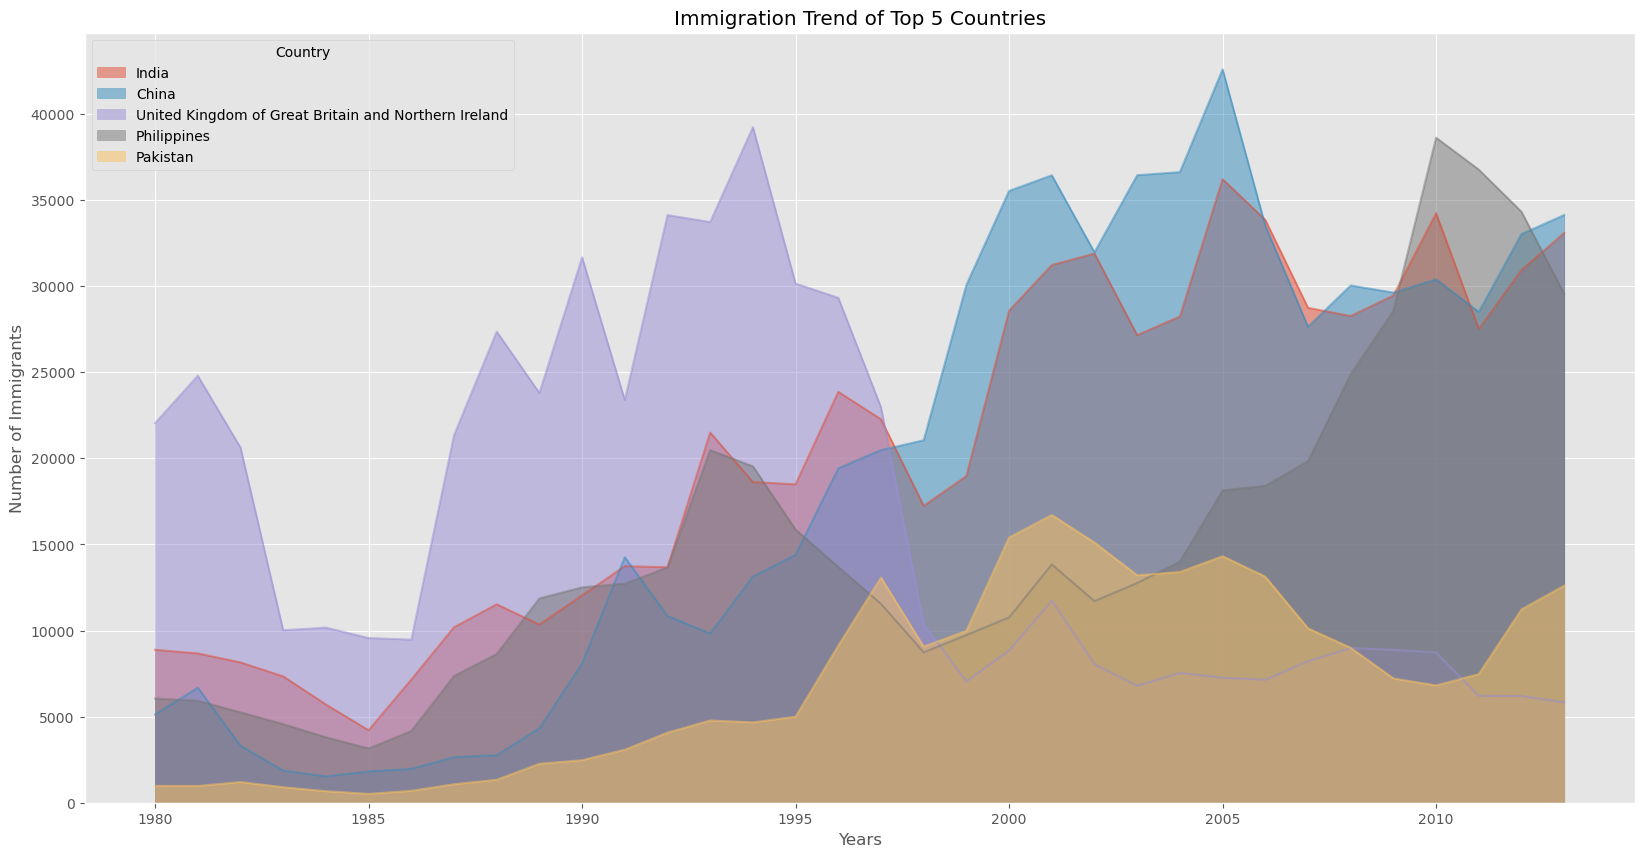

In [12]:
# converting our index values (years) from strings to ints for plotting
df_top5.index = df_top5.index.map(int)
df_top5.plot(kind='area',
             stacked=False, 
             figsize=(20,10)) 
plt.title('Immigration Trend of Top 5 Countries')
plt.ylabel('Number of Immigrants')
plt.xlabel('Years')

plt.show()


Adjusting our transparency value:

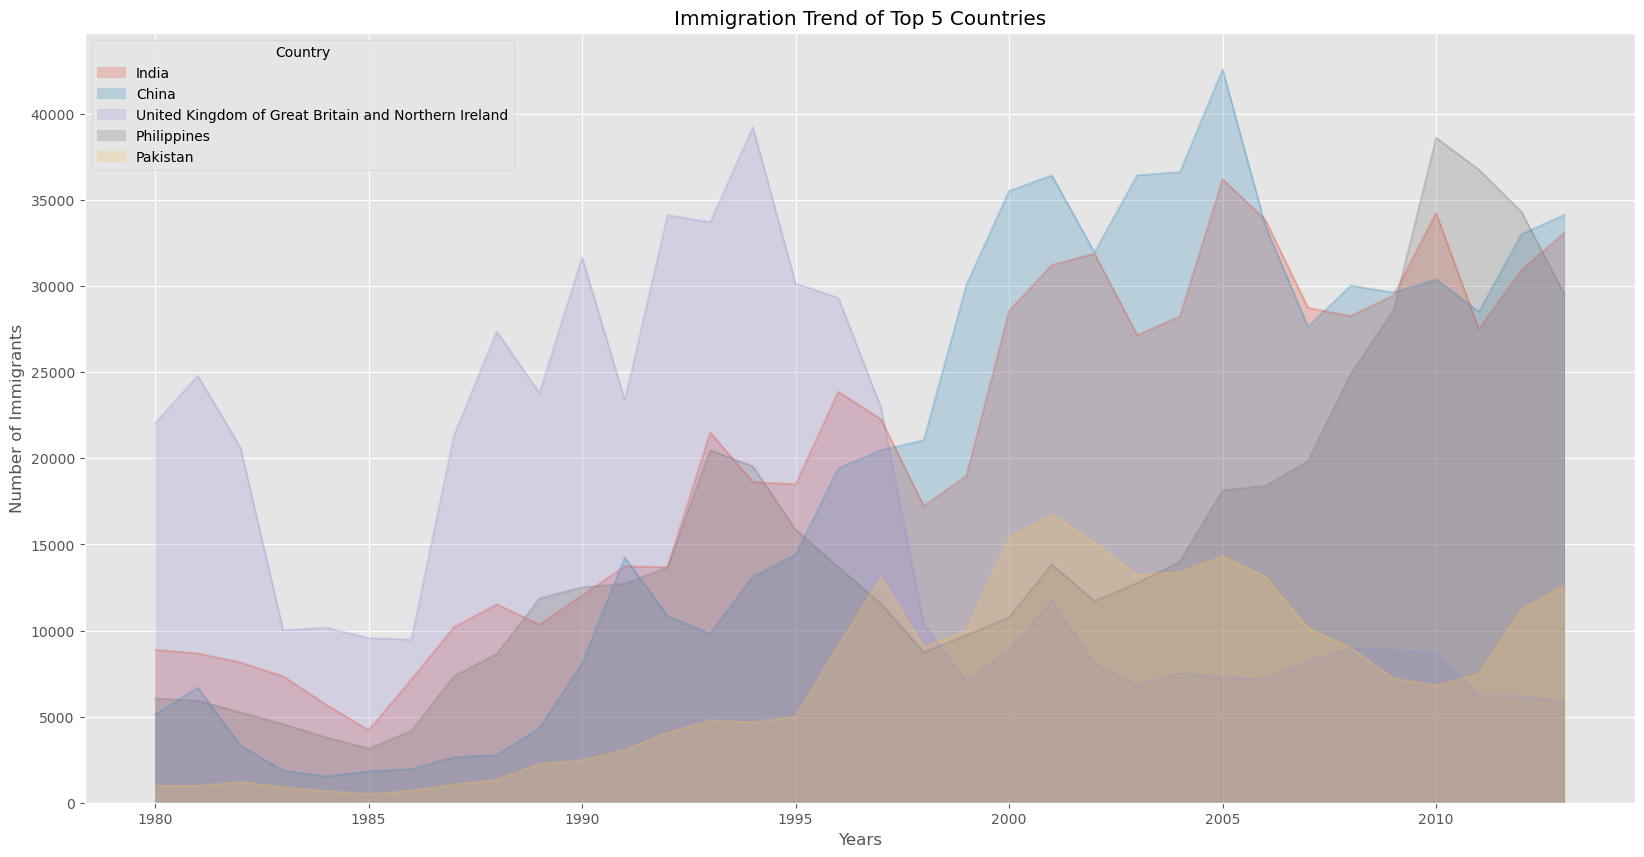

In [13]:
df_top5.plot(kind='area',
             alpha=0.25,
             stacked=False, 
             figsize=(20,10)) 
plt.title('Immigration Trend of Top 5 Countries')
plt.ylabel('Number of Immigrants')
plt.xlabel('Years')

plt.show()

#### Now let's do the same but instead of using the scripting layer, let's utilize the Artist layer as it the preferred option with more flexibility.

Text(0.5, 0, 'Years')

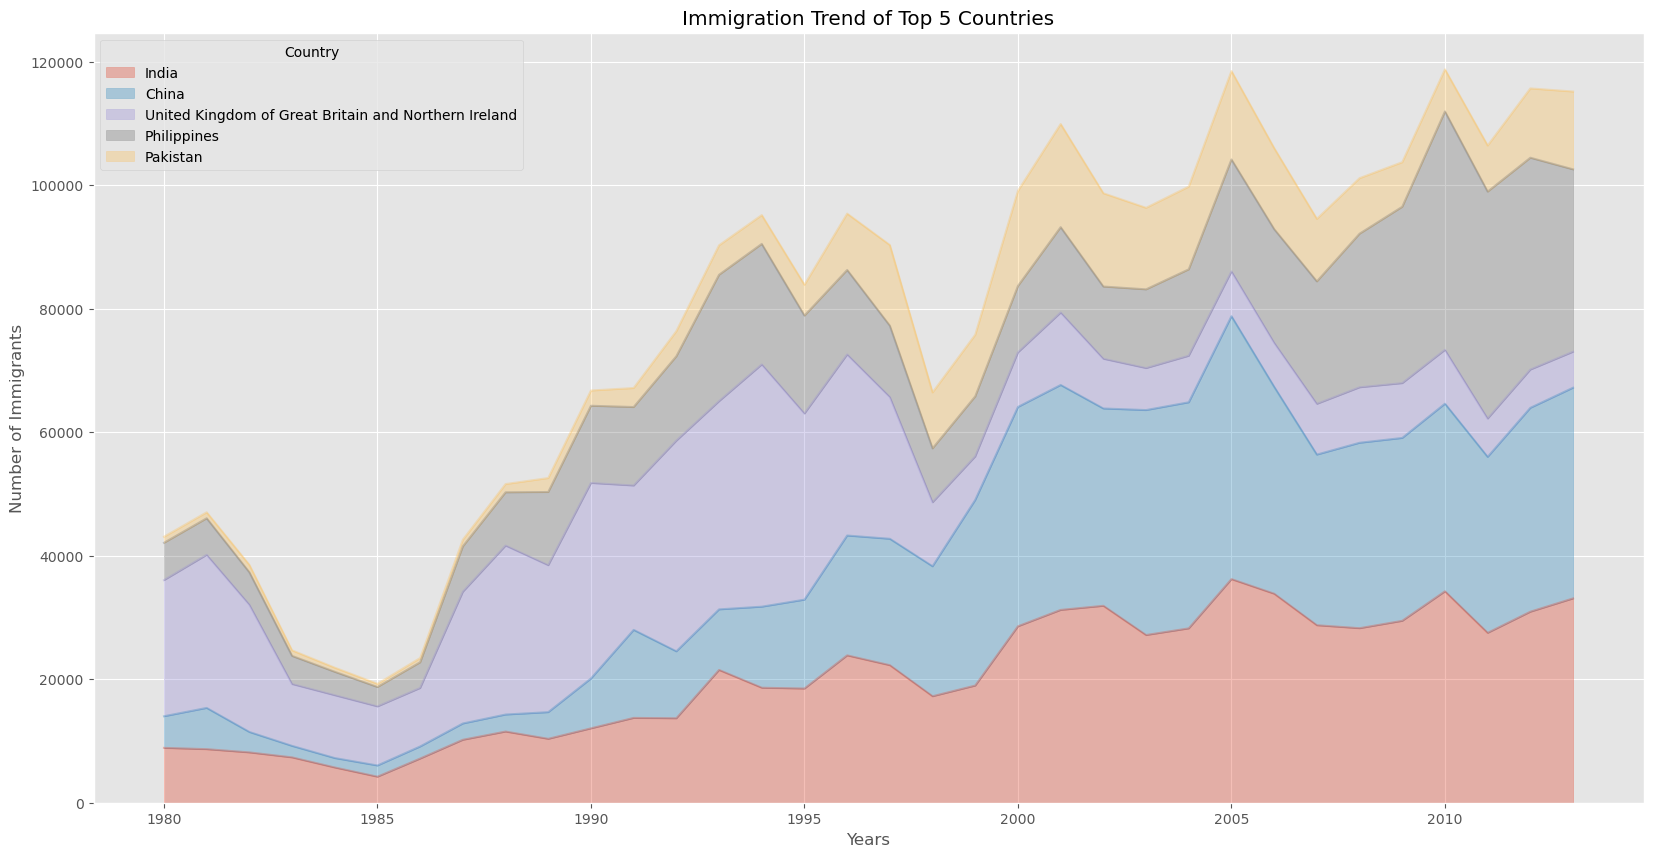

In [15]:
ax = df_top5.plot(kind='area', alpha=0.35, figsize=(20, 10))

ax.set_title('Immigration Trend of Top 5 Countries')
ax.set_ylabel('Number of Immigrants')
ax.set_xlabel('Years')

#### Bottom 5 Countries

Using the scripting layer, <code>Plotly</code>:

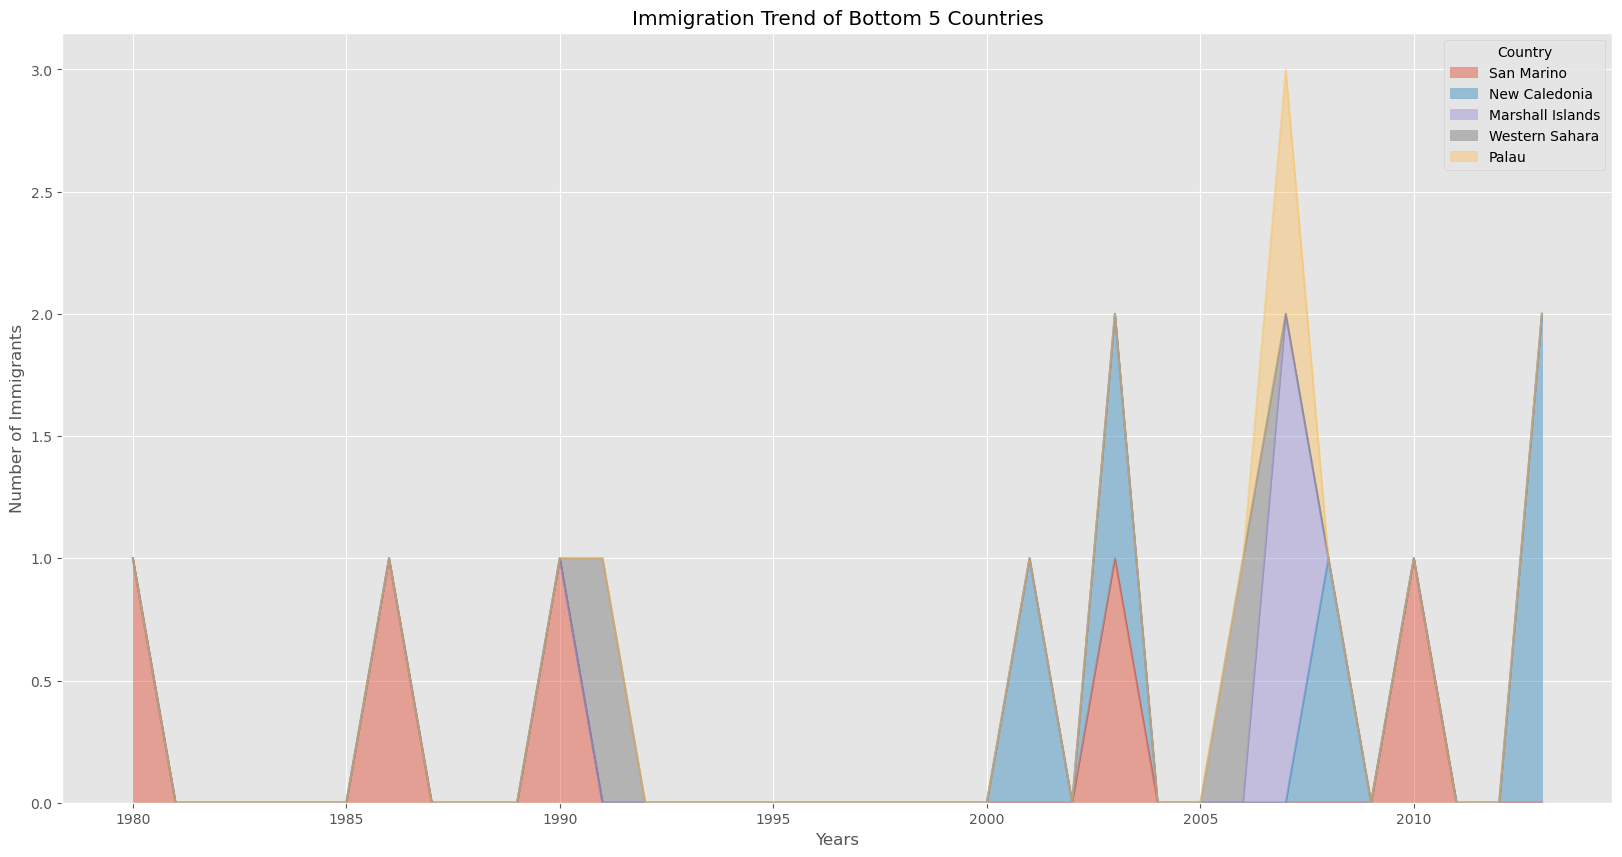

In [29]:
df_bottom5 = df_canada.tail()
df_bottom5 = df_bottom5[years].transpose()
df_bottom5.index = df_bottom5.index.map(int)
#transparency value of .45
df_bottom5.plot(kind='area', alpha=0.45, figsize=(20,10))
plt.title('Immigration Trend of Bottom 5 Countries')
plt.ylabel('Number of Immigrants')
plt.xlabel('Years')

plt.show()

Using the <code>Artist</code> layer:

Text(0.5, 0, 'Years')

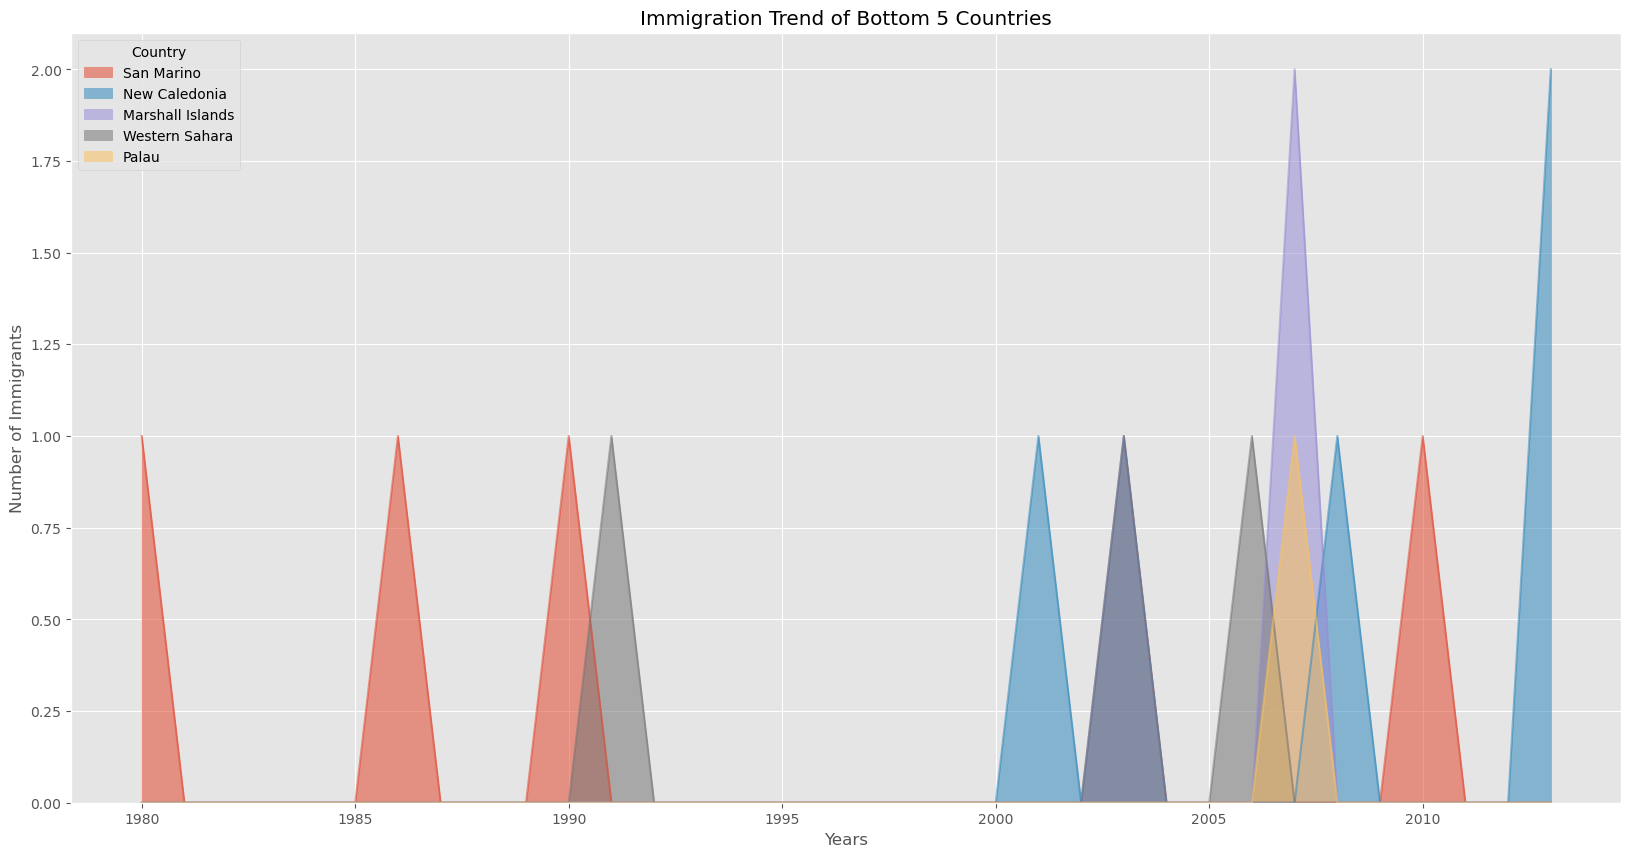

In [32]:
# using transparency value of .55, unstacked
ax = df_bottom5.plot(kind='area',stacked=False, alpha=0.55, figsize=(20, 10))
ax.set_title('Immigration Trend of Bottom 5 Countries')
ax.set_ylabel('Number of Immigrants')
ax.set_xlabel('Years')


## Histograms

#### What is the frequency distribution of the number of new immigrants from the various countries to Canada in 2013?


In [34]:
# first let's split the data into equeal intervals 
count, bin_edges = np.histogram(df_canada['2013'])
print(count)
print(bin_edges)

[178  11   1   2   0   0   0   0   1   2]
[    0.   3412.9  6825.8 10238.7 13651.6 17064.5 20477.4 23890.3 27303.2
 30716.1 34129. ]


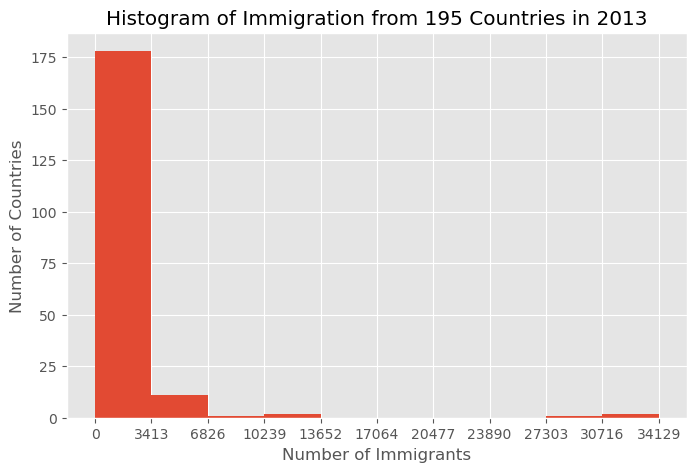

In [36]:
df_canada['2013'].plot(kind='hist', figsize=(8,5), xticks=bin_edges)
plt.title('Histogram of Immigration from 195 Countries in 2013')
plt.ylabel('Number of Countries')
plt.xlabel('Number of Immigrants')

plt.show()

#### What is the immigration distribution for Denmark, Norway, and Sweden for the years 1980 - 2013?

In [37]:
df_canada.loc[['Denmark','Norway','Sweden'], years]

,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
Country,,,,,,,,,,,,,,,,,,,,,
Denmark,272,293,299,106,93,73,93,109,129,129,...,89,62,101,97,108,81,92,93,94,81
Norway,116,77,106,51,31,54,56,80,73,76,...,73,57,53,73,66,75,46,49,53,59
Sweden,281,308,222,176,128,158,187,198,171,182,...,129,205,139,193,165,167,159,134,140,140


In [39]:
df_dns = df_canada.loc[['Denmark','Norway','Sweden'], years].transpose()
df_dns.head()

Country,Denmark,Norway,Sweden
1980,272,116,281
1981,293,77,308
1982,299,106,222
1983,106,51,176
1984,93,31,128


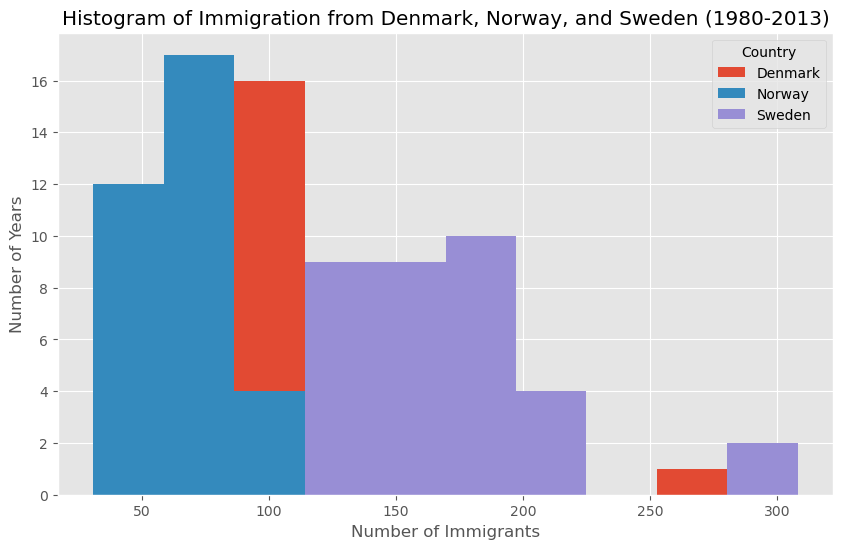

In [40]:
df_dns.plot(kind='hist', figsize=(10, 6))

plt.title('Histogram of Immigration from Denmark, Norway, and Sweden (1980-2013)')
plt.ylabel('Number of Years')
plt.xlabel('Number of Immigrants')

plt.show()

We can improve this a bit:

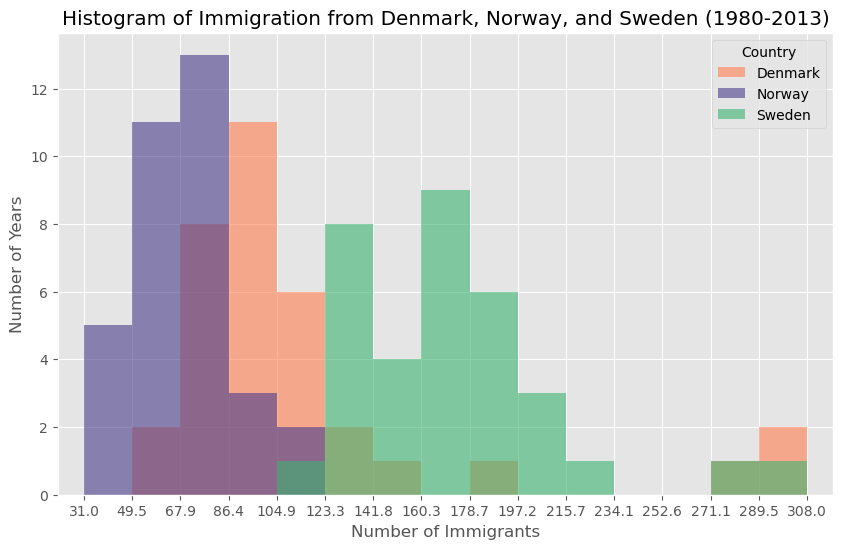

In [42]:
# getting xticks and increasing bins to 15
count, bin_edges = np.histogram(df_dns, 15)

xmin = bin_edges[0] - 10   #  first bin value is 31.0, adding buffer of 10 for aesthetic purposes 
xmax = bin_edges[-1] + 10  #  last bin value is 308.0, adding buffer of 10 for aesthetic purposes


# unstacked and bins set to 15
df_dns.plot(kind='hist',
           figsize=(10,6),
           bins=15,
           alpha=0.6,
           xticks=bin_edges,
           color=['coral', 'darkslateblue','mediumseagreen'],
           xlim=(xmin,xmax)) # setting x axis limits
plt.title('Histogram of Immigration from Denmark, Norway, and Sweden (1980-2013)')
plt.ylabel('Number of Years')
plt.xlabel('Number of Immigrants')

plt.show()

#### What is the immigration distribution for Greece, Albania, and Bulgaria for the years 1980 - 2013?

In [45]:
df_gab = df_canada.loc[['Greece','Albania','Bulgaria'], years] 
df_gab = df_gab.transpose()

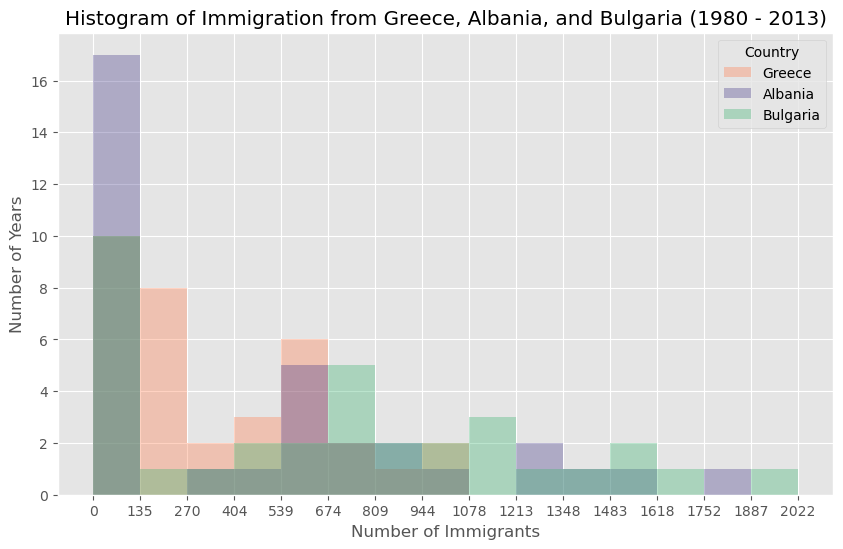

In [48]:
# transparency value of 0.35
count, bin_edges = np.histogram(df_gab, 15)

df_gab.plot(kind='hist', figsize=(10,6), bins=15, alpha=0.35, 
            xticks=bin_edges,
           color=['coral', 'darkslateblue', 'mediumseagreen'])
plt.title('Histogram of Immigration from Greece, Albania, and Bulgaria (1980 - 2013)')
plt.ylabel('Number of Years')
plt.xlabel('Number of Immigrants') 

plt.show()

## Bar Charts 

#### How does Icelandic immigration compare over the years?

Retrieving data:

In [49]:
df_iceland = df_canada.loc['Iceland', years]
df_iceland.head()

1980    17
1981    33
1982    10
1983     9
1984    13
Name: Iceland, dtype: object

Plotting data:

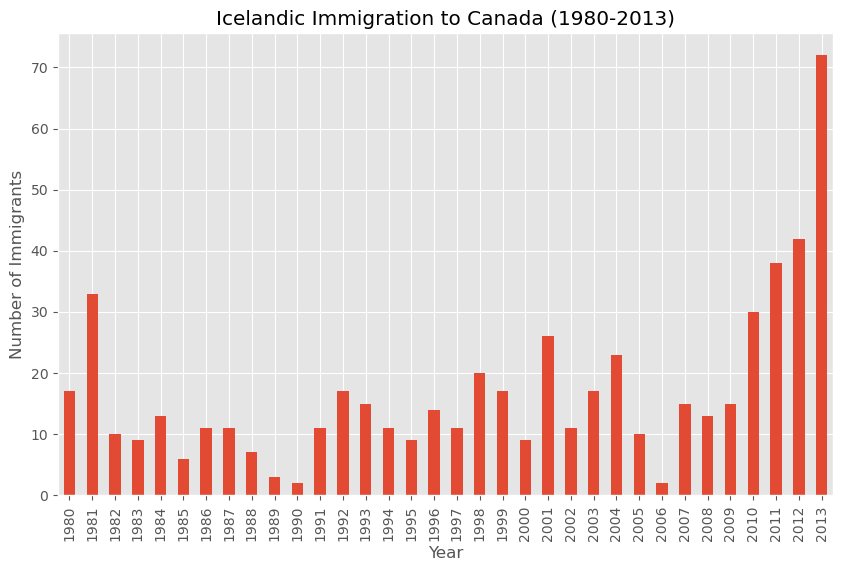

In [50]:
df_iceland.plot(kind='bar', figsize=(10,6))

plt.title('Icelandic Immigration to Canada (1980-2013)')
plt.xlabel('Year')
plt.ylabel('Number of Immigrants')

plt.show()

We can see the effects of the financial crisis, let's annote this graph to explain this detail:

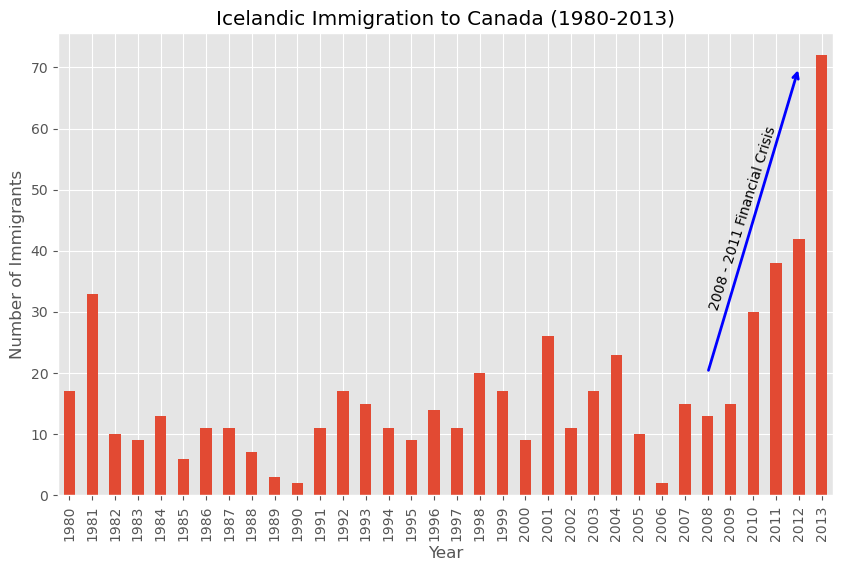

In [53]:
df_iceland.plot(kind='bar', figsize=(10,6))

plt.title('Icelandic Immigration to Canada (1980-2013)')
plt.xlabel('Year')
plt.ylabel('Number of Immigrants')

# arrow
plt.annotate('', # blank for no text
            xy=(32, 70), # coordinates of endpoint
            xytext=(28, 20), # coordinates of startpoint
            xycoords='data', # set coordinate sys of obj being annotated
            arrowprops=dict(arrowstyle='->', connectionstyle='arc3',
                           color='blue', lw=2))
# arc3 = straight line
# lw = linewidth
# -> = standard arrow

# text above arrow
plt.annotate('2008 - 2011 Financial Crisis',
            xy=(28,30), # starting coordinates
            rotation=72.5, # based on trial and err to match arrow slope
            va='bottom', # vertically bottom aligned
            ha='left') # hotizontally left aligned

plt.show()

#### Top 15 Countries:

Retrieving the 15 countries with highest total immigration:

In [60]:
df_top15 = df_canada['Total'].head(15)

<function matplotlib.pyplot.show(close=None, block=None)>

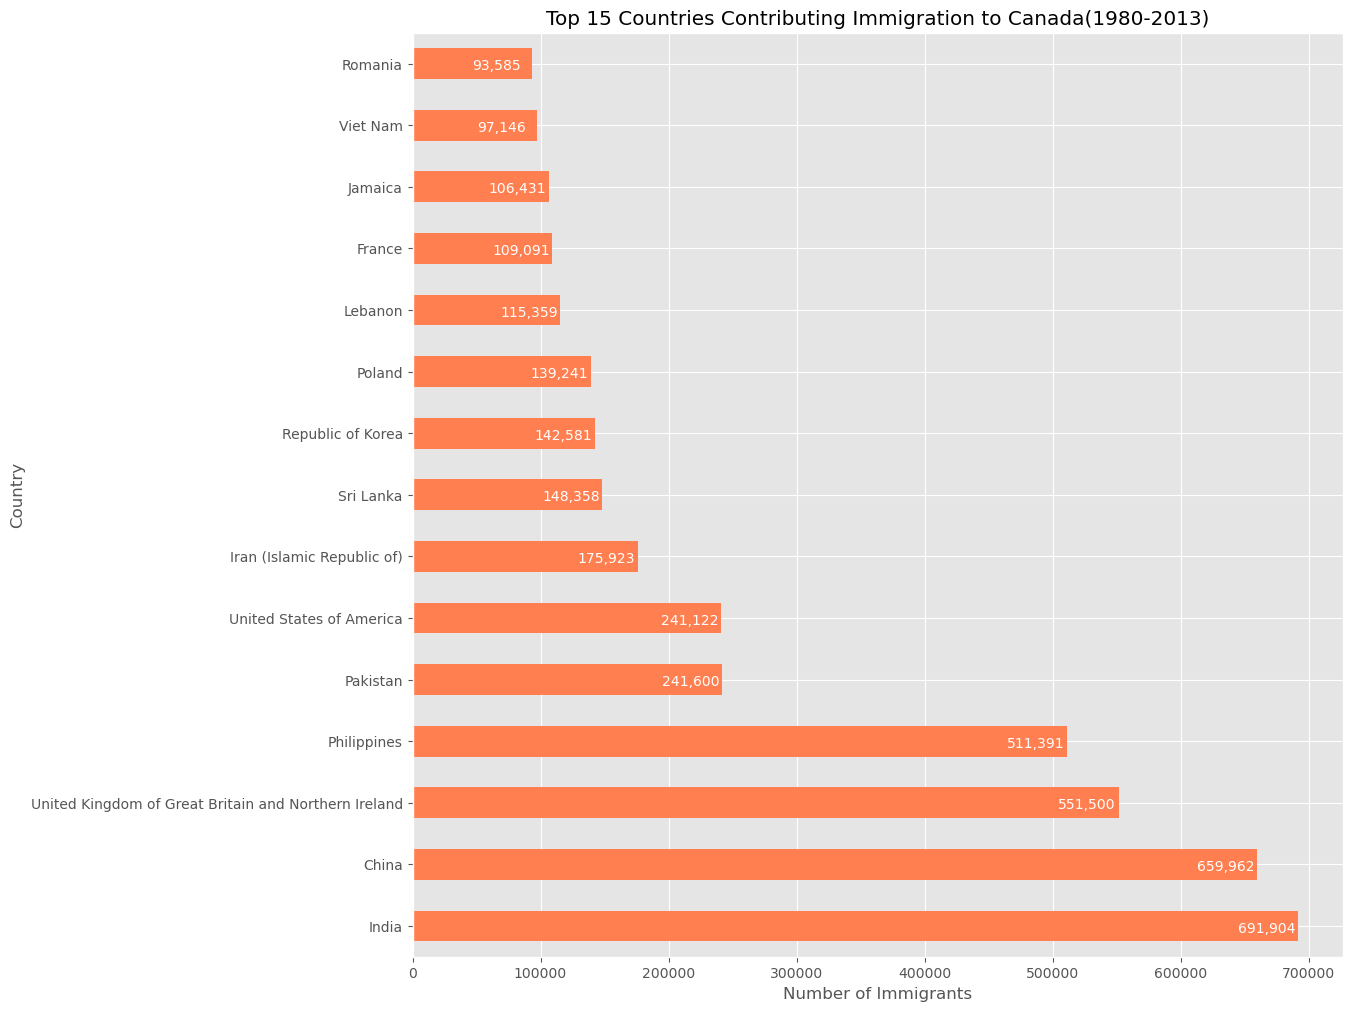

In [65]:
# horizontal plot
df_top15.plot(kind='barh', color='coral', figsize=(12,12))

# labels
plt.xlabel('Number of Immigrants')
plt.title('Top 15 Countries Contributing Immigration to Canada(1980-2013)')

# iterating through df, labeling each bar with total number
for index, value in enumerate(df_top15):
    label = format(int(value), ',') # formatting int with commas
    plt.annotate(label,
             xy=(value - 47000, index-0.10), # placing text at end of bar
             color='white')

plt.show